In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from tqdm import tqdm
from math import floor

# Basic Model: SEIR


In [2]:
def base_seir_model(init_vals, params, t):
    S_0, E_0, I_0, R_0 = init_vals
    S, E, I, R = [S_0], [E_0], [I_0], [R_0]
    alpha, beta, gamma = params
    dt = t[1] - t[0]
    for _ in t[1:]:
        next_S = S[-1] - (beta*S[-1]*I[-1])*dt
        next_E = E[-1] + (beta*S[-1]*I[-1] - alpha*E[-1])*dt
        next_I = I[-1] + (alpha*E[-1] - gamma*I[-1])*dt
        next_R = R[-1] + (gamma*I[-1])*dt
        S.append(next_S)
        E.append(next_E)
        I.append(next_I)
        R.append(next_R)
    return np.stack([S, E, I, R]).T

In [3]:
# Define parameters
t_max = 100
dt = .1
t = np.linspace(0, t_max, int(t_max/dt) + 1)
N = 10000
init_vals = 1 - 1/N, 1/N, 0, 0
alpha = 0.2
beta = 1.75
gamma = 0.5
params = alpha, beta, gamma
# Run simulation
results = base_seir_model(init_vals, params, t)

In [4]:
def plot_results(results, t, params):
    t_all = np.repeat(t, 4, axis=0).reshape(1001, 4).T.reshape(-1)
    t_pd = pd.DataFrame({'time': t_all})
    results = pd.DataFrame(results).melt()
    results = pd.concat([results, t_pd], axis=1)
#     sns.lineplot(x='time', y='value', data=results[results['variable']==0], label='Susceptible')
    sns.lineplot(x='time', y='value', data=results[results['variable']==1], label='Exposed')
    sns.lineplot(x='time', y='value', data=results[results['variable']==2], label='Infected')
#     sns.lineplot(x='time', y='value', data=results[results['variable']==3], label='Recovered')
    plt.title(f'SEIR Model with params {params}')

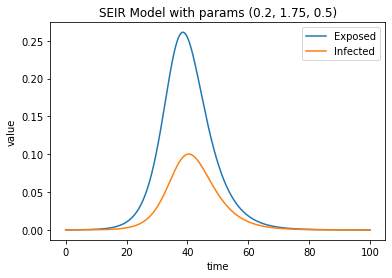

In [5]:
plot_results(results, t, params)

In [6]:
def seir_model_with_soc_dist(init_vals, params, t):
    S_0, E_0, I_0, R_0 = init_vals
    S, E, I, R = [S_0], [E_0], [I_0], [R_0]
    alpha, beta, gamma, rho = params
    dt = t[1] - t[0]
    for _ in t[1:]:
        next_S = S[-1] - (rho*beta*S[-1]*I[-1])*dt
        next_E = E[-1] + (rho*beta*S[-1]*I[-1] - alpha*E[-1])*dt
        next_I = I[-1] + (alpha*E[-1] - gamma*I[-1])*dt
        next_R = R[-1] + (gamma*I[-1])*dt
        S.append(next_S)
        E.append(next_E)
        I.append(next_I)
        R.append(next_R)
    return np.stack([S, E, I, R]).T

In [7]:
def plot_results_sd(results, t, params):
    t_all = np.repeat(t, 4, axis=0).reshape(1001, 4).T.reshape(-1)
    t_pd = pd.DataFrame({'time': t_all})
    results = pd.DataFrame(results).melt()
    results = pd.concat([results, t_pd], axis=1)
#     sns.lineplot(x='time', y='value', data=results[results['variable']==0], label='Susceptible')
    sns.lineplot(x='time', y='value', data=results[results['variable']==1], label=f'Exposed Rao={params[-1]}')
    sns.lineplot(x='time', y='value', data=results[results['variable']==2], label=f'Infected Rao={params[-1]}')
#     sns.lineplot(x='time', y='value', data=results[results['variable']==3], label='Recovered')
    plt.title(f'SEIR Social Distancing Model params {params[:-1]}')
    plt.legend(bbox_to_anchor=(1.5, 1.05))


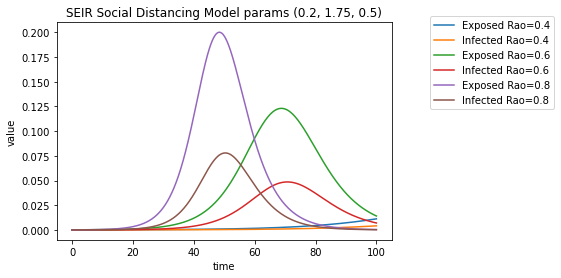

In [8]:
# Define parameters
t_max = 100
dt = .1
t = np.linspace(0, t_max, int(t_max/dt) + 1)
N = 10000
init_vals = 1 - 1/N, 1/N, 0, 0
alpha = 0.2
beta = 1.75
gamma = 0.5
for rao in np.arange(4, 10, 2):
    params = alpha, beta, gamma, int(rao)/10
    # Run simulation
    results = seir_model_with_soc_dist(init_vals, params, t)
    plot_results_sd(results, t, params)